<h1><center><b>Machine Learning</b></center></h1>
<h3><center>K-Means and PCA<center></h3>

## Part 1 - K-Means

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [17]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [18]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

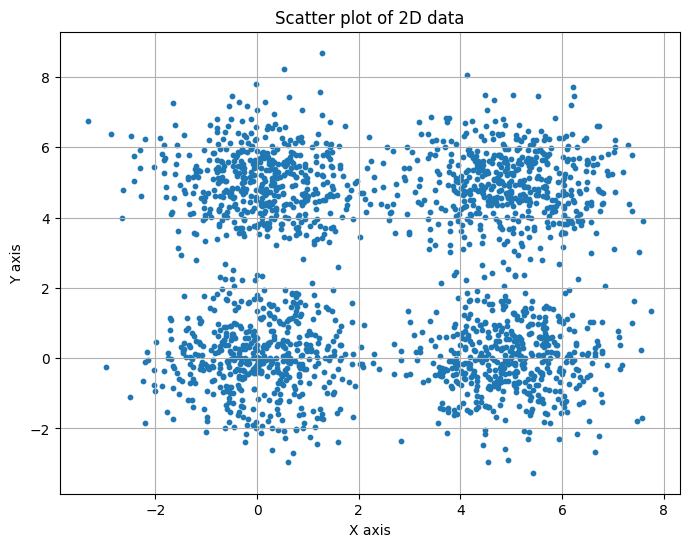

In [19]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Scatter plot of 2D data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()

### **3. K-Means**

Implement the algorithm

In [20]:
class KMeans():
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.

    def fit(self, X):
        self.X_fit_ = X
        
        # Step 1: Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Step 2: Assign labels based on closest centroid
            labels = self._get_labels(X)
            
            # Step 3: Calculate new centroids based on mean of points in each cluster
            centroids = self._get_centroids(X, labels)
            
            # Calculate cost (inertia) for this iteration
            cost = self._calculate_cost(X, centroids, labels)
            self.costs.append(cost)
            
            # Check for convergence: If centroids do not change significantly, break
            if np.allclose(centroids, self.centroids):
                break
            
            # Update centroids and labels for next iteration
            self.centroids = centroids
            self.labels_ = labels
            self.labels_history.append(labels)
            self.centroids_history.append(centroids)

    def predict(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_distances(self, X):
        return np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2)

    def _get_labels(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)
        return centroids

    def _calculate_cost(self, X, centroids, labels):
        distances = np.sum((X - centroids[labels]) ** 2, axis=1)
        return np.sum(distances)



Run the algorithm on the 2D dataset

In [21]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

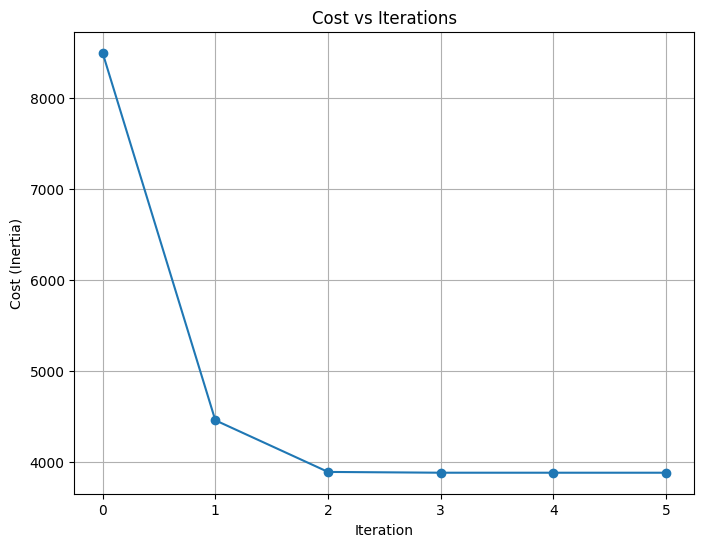

In [22]:
# Assuming the previous code has already run and kmeans has been fitted
costs = kmeans.costs

# Plot the costs as a function of the iterations
plt.figure(figsize=(8, 6))
plt.plot(costs, marker='o')
plt.title('Cost vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (Inertia)')
plt.grid(True)
plt.show()

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

In [23]:
# Running KMeans with different n_clusters
cluster_counts = [2, 3, 4, 6, 8, 10, 20]
final_costs = {}

for n_clusters in cluster_counts:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    final_costs[n_clusters] = kmeans.costs[-1]

# Print the final costs for each number of clusters
for n_clusters, cost in final_costs.items():
    print(f"{n_clusters} clusters: {cost:.2f}")

2 clusters: 16026.57
3 clusters: 9995.95
4 clusters: 3881.29
6 clusters: 3312.49
8 clusters: 2638.09
10 clusters: 2352.55
20 clusters: 1213.75


Now write a code that plots the clusters and the locations of the centroids at each iteration

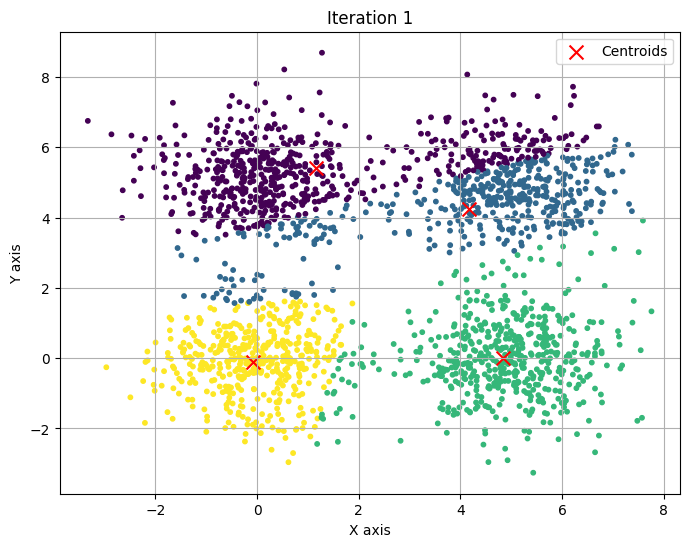

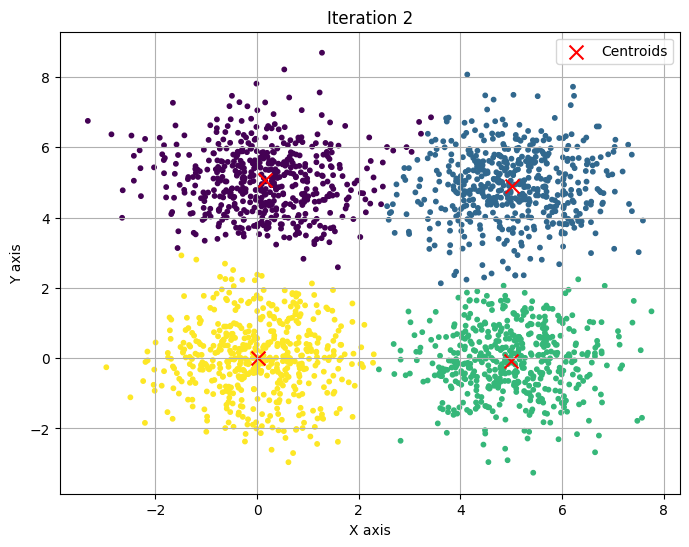

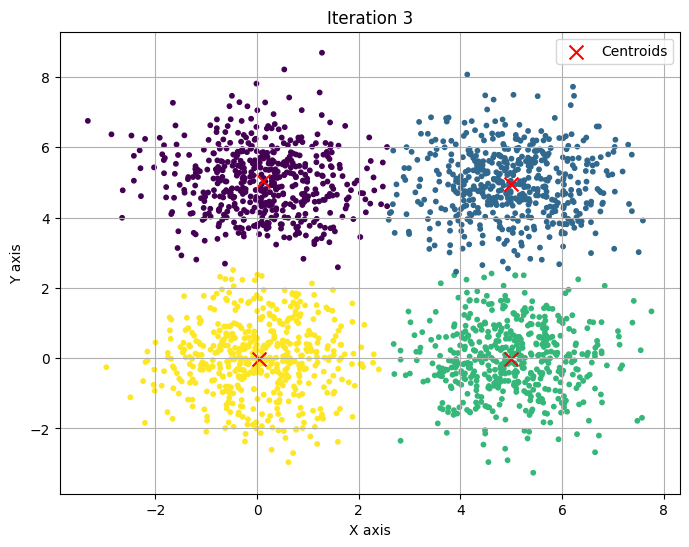

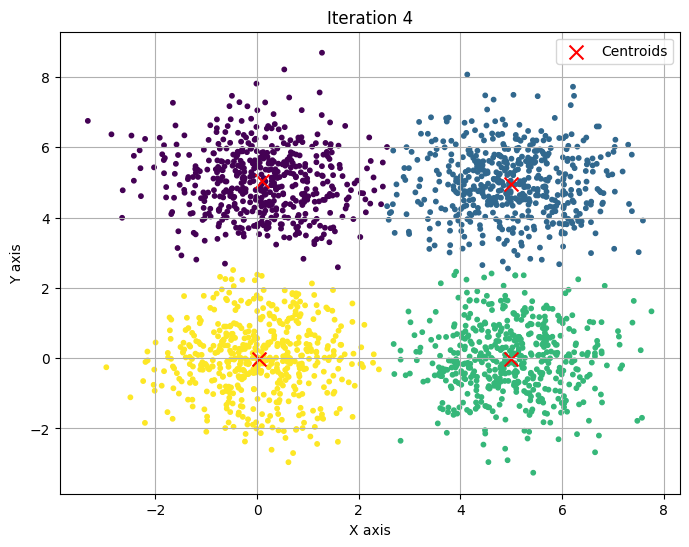

In [24]:
# Function to plot clusters and centroids for each iteration
def plot_clusters_iterations(kmeans, X):
    for i, (centroids, labels) in enumerate(zip(kmeans.centroids_history, kmeans.labels_history)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
        plt.title(f'Iteration {i+1}')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.legend()
        plt.grid(True)
        plt.show()

# restore the clusters count to 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Plot clusters and centroids for each iteration
plot_clusters_iterations(kmeans, X)

## Part 2 - PCA

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [25]:
import numpy as np
class PCA:
    def __init__(self):
        self.V = None
        self.eigenvectors = None
        self.eigenvalues = None
        self.n_dimensions = None
        self.col_means = None

    def fit(self, X):
        # Center data along columns (features)
        col_means = np.mean(X, axis=0, keepdims=True)
        self.col_means = col_means[0,:]
        X_centered = X - col_means
        
        # Calculate covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False) 
        
        # Compute eigenvectors and eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        self.eigenvectors = sorted_eigenvectors
        self.eigenvalues = sorted_eigenvalues
        self.V = eigenvectors[:, sorted_indices]

    def transform(self, X, n_dimensions):
        self.n_dimensions = n_dimensions
        self.V = self.eigenvectors[:, :n_dimensions]
        col_means = np.mean(X, axis=0, keepdims=True)
        X_centered = X - col_means
        
        X_reduced = np.dot(X_centered, self.V)

        return X_reduced



Run the algorithm on MNIST dataset.

In [26]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

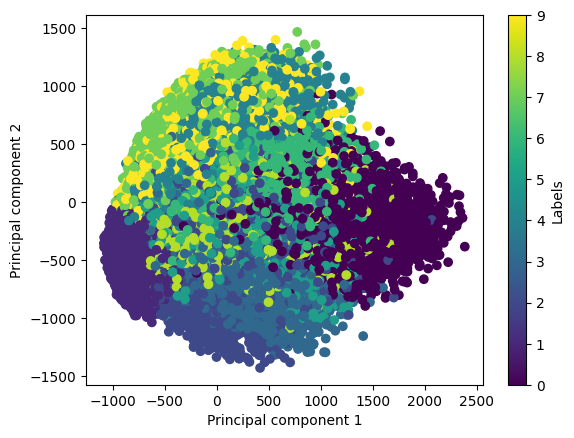

In [27]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()


As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

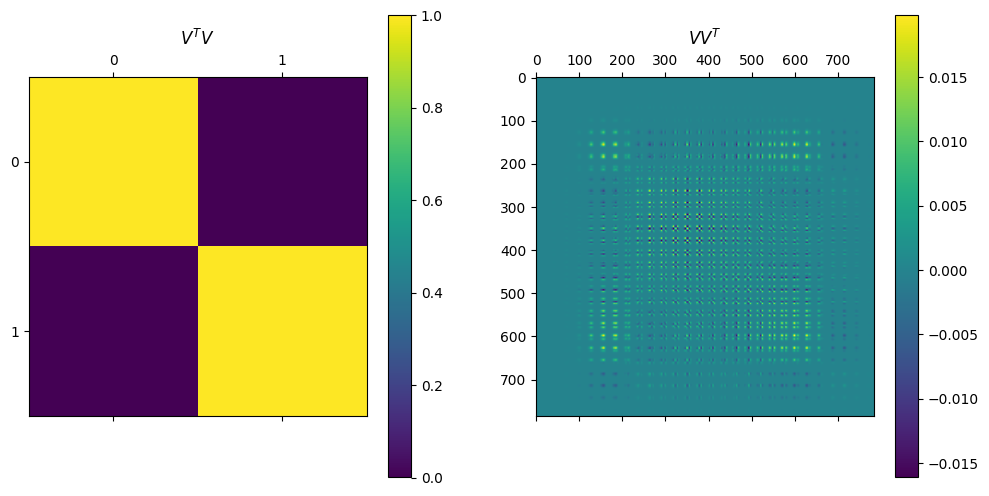

In [29]:
# Number of dimensions (top r eigenvectors)
r = pca.n_dimensions

# Get the top r eigenvectors
V = pca.V[:, :r]

# Compute V^TV and VV^T
V_TV = np.dot(V.T, V)
VV_T = np.dot(V, V.T)

# Plot the matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot V^TV
cax1 = axs[0].matshow(V_TV, cmap='viridis')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_title(r'$V^TV$')

# Plot VV^T
cax2 = axs[1].matshow(VV_T, cmap='viridis')
fig.colorbar(cax2, ax=axs[1])
axs[1].set_title(r'$VV^T$')

plt.show()

Explanation:

$V^TV$<br>
Shows that the top 𝑟 eigenvectors form an orthonormal set.<br>
Diagonal elements are 1 (yellow), off-diagonal elements are 0 (purple).<br>

$VV^T$<br>
Shows the projection of the data onto the subspace spanned by the top r principal components.<br>
Diagonal elements indicate variance retention in the original dimensions.<br>
Off-diagonal elements indicate correlation between dimensions in the projected space.<br>

By comparing these two matrices, we can understand how PCA transforms the data to a lower-dimensional space while preserving as much variance as possible and ensuring that the principal components are orthogonal to each other.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [30]:
def pca_reconstruction(x, n_dimensions, mean, V):
    # Center the sample
    x_centered = x - mean
    
    # Project the sample to the n-dimensional space
    V_reduced = V[:, :n_dimensions]
    x_projected = np.dot(x_centered, V_reduced)
    
    # Reconstruct the sample back to the original space
    x_reconstructed = np.dot(x_projected, V_reduced.T) + mean
    
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


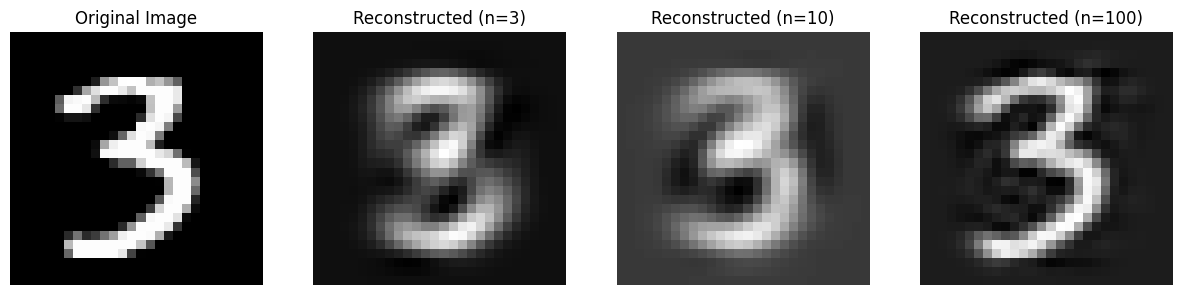

In [46]:
# Initialize and fit PCA
pca = PCA()
pca.fit(X)
mean = col_means = np.mean(X, axis=0)
V = pca.V

# Sample a random image from the dataset
random_idx = np.random.randint(X.shape[0])
x_sample = X[random_idx]

# Perform the reconstruction for spaces of dimensions 3, 10, and 100
dimensions = [3, 10, 100]
reconstructed_images = []

for dim in dimensions:
    x_reconstructed = pca_reconstruction(x_sample, dim, mean, V)
    reconstructed_images.append(x_reconstructed)

# Plot the original and reconstructed images
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Original image
axes[0].imshow(x_sample.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Reconstructed images
for i, dim in enumerate(dimensions):
    axes[i + 1].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    axes[i + 1].set_title(f'Reconstructed (n={dim})')
    axes[i + 1].axis('off')

plt.show()